In [12]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator  # pylint: disable=import-error, no-name-in-module
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector
from qiskit_aer import Aer
from qiskit.visualization import array_to_latex
import numpy as np
from qiskit import assemble
from math import pi
from qiskit.visualization import plot_bloch_multivector, plot_histogram, array_to_latex

# Bernstein-Vazirani Algorithm

In [16]:
n = 3 # number of qubits used to represent s
s = '110'   # the hidden binary string

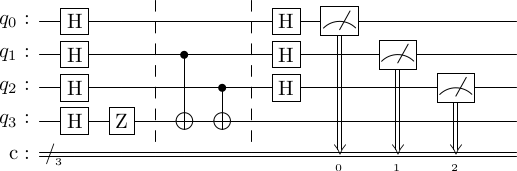

In [17]:
# We need a circuit with n qubits, plus one auxiliary qubit
# Also need n classical bits to write the output to
bv_circuit = QuantumCircuit(n+1, n)

# put auxiliary in state |->
bv_circuit.h(n)
bv_circuit.z(n)

# Apply Hadamard gates before querying the oracle
for i in range(n):
    bv_circuit.h(i)
    
# Apply barrier 
bv_circuit.barrier()

# Apply the inner-product oracle
s = s[::-1] # reverse s to fit qiskit's qubit ordering
for q in range(n):
    if s[q] != '0':
        bv_circuit.cx(q, n)
        
# Apply barrier 
bv_circuit.barrier()

#Apply Hadamard gates after querying the oracle
for i in range(n):
    bv_circuit.h(i)

# Measurement
for i in range(n):
    bv_circuit.measure(i, i)

bv_circuit.draw(output="latex")

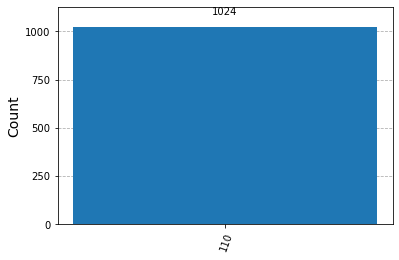

In [18]:
# use local simulator
aer_sim = Aer.get_backend('aer_simulator')
shots = 1024
results = aer_sim.run(bv_circuit).result()
answer = results.get_counts()

plot_histogram(answer)

## Simon's Algorithm

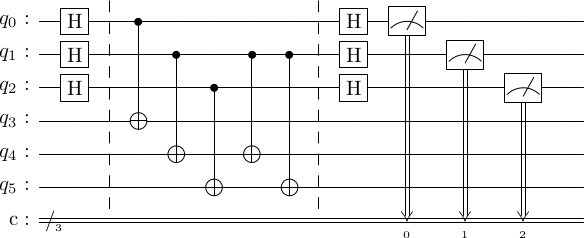

In [9]:
from qiskit_textbook.tools import simon_oracle
b = '110'

n = len(b)
simon_circuit = QuantumCircuit(n*2, n)

# Apply Hadamard gates before querying the oracle
simon_circuit.h(range(n))    
    
# Apply barrier for visual separation
simon_circuit.barrier()

simon_circuit = simon_circuit.compose(simon_oracle(b))

# Apply barrier for visual separation
simon_circuit.barrier()

# Apply Hadamard gates to the input register
simon_circuit.h(range(n))

# Measure qubits
simon_circuit.measure(range(n), range(n))
simon_circuit.draw(output="latex")

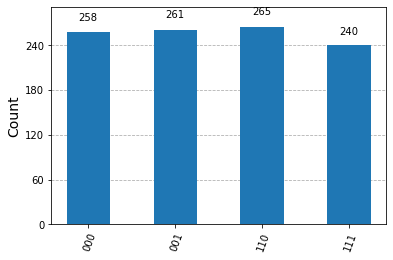

In [10]:
# use local simulator
aer_sim = Aer.get_backend('aer_simulator')
results = aer_sim.run(simon_circuit).result()
counts = results.get_counts()
plot_histogram(counts)

In [11]:
# Calculate the dot product of the results
def bdotz(b, z):
    accum = 0
    for i in range(len(b)):
        accum += int(b[i]) * int(z[i])
    return (accum % 2)

for z in counts:
    print( '{}.{} = {} (mod 2)'.format(b, z, bdotz(b,z)) )

110.110 = 0 (mod 2)
110.111 = 0 (mod 2)
110.001 = 0 (mod 2)
110.000 = 0 (mod 2)


Using these results, we can recover the value of $b = 110$ by solving this set of simultaneous equations. For example, say we first measured `001`, this tells us:

$$
\require{cancel}
\begin{aligned}
b \cdot 001 &= 0 \\
(b_2 \cdot 0) + (b_1 \cdot 0) + (b_0 \cdot 1) & = 0 \\
(\cancel{b_2 \cdot 0}) + (\cancel{b_1 \cdot 0}) + (b_0 \cdot 1) & = 0 \\
b_0 & = 0\\
\end{aligned}
$$

If we next measured `111`, we have:

$$
\require{cancel}
\begin{aligned}
b \cdot 111 &= 0 \\
(b_2 \cdot 1) + (b_1 \cdot 1) + (\cancel{0 \cdot 1}) & = 0 \\
(b_2 \cdot 1) + (b_1 \cdot 1) & = 0 \\
\end{aligned}
$$

Which tells us either:

$$ b_2 = b_1 = 0, \quad b = 000 $$

or 

$$ b_2 = b_1 = 1, \quad b = 110 $$

Of which $b  = 110$ is the non-trivial solution to our simultaneous equations. We can solve these problems in general using [Gaussian elimination](https://mathworld.wolfram.com/GaussianElimination.html), which has a run time of $O(n^3)$.